In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
varinfo.clear()

dout = 'y_pairing/'

In [3]:
signaliter = ObjIter([ Tree(f) for f in fc.eightb.training.signal_list ])

In [ ]:
signaliter = signaliter.apply(EventFilter("nmatched==8",nfound_presel=8).filter)

TypeError: list indices must be integers or slices, not str

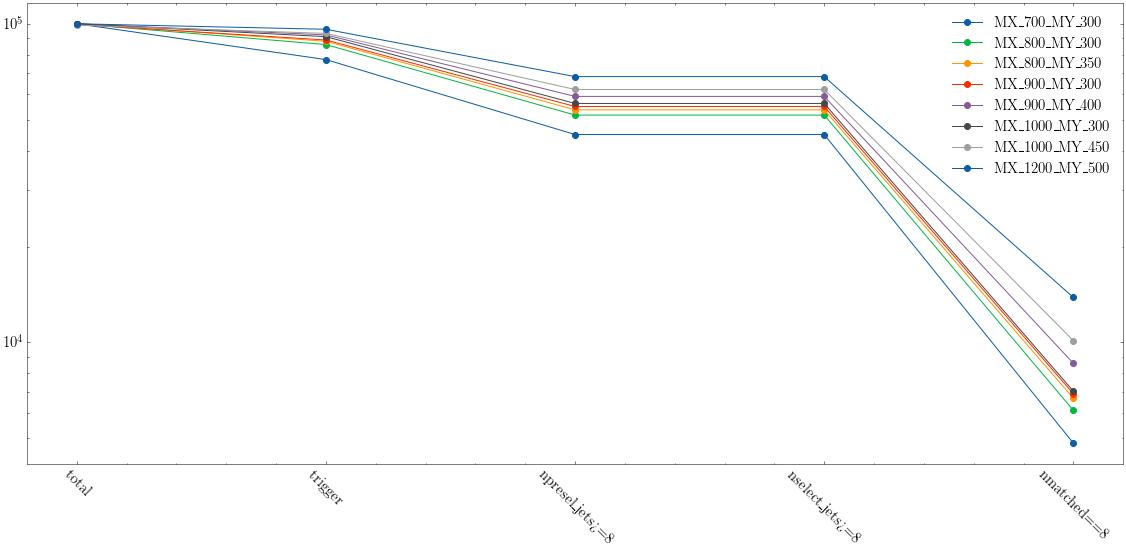

(<Figure size 1152x576 with 1 Axes>, <AxesSubplot:>)

In [ ]:
study.cutflow(signaliter)

In [5]:
signaliter.extend(kwargs=eightb.reco_all)

In [6]:
signaliter.extend(kwargs=lambda t : build_collection(t,'gen_Y\d','gen_y'))
signaliter.extend(kwargs=lambda t : build_collection(t,'gen_H\dY\d','gen_higgs'))

KeyboardInterrupt: 

In [ ]:
signaliter.extend(kwargs=lambda t : dict(gen_higgs_signalId=ak.local_index(t.gen_higgs_pt,axis=-1)))

In [15]:
higgs_maxpt_id = signaliter.gen_higgs_reco_pt.apply(lambda array : ak.argsort(-array,axis=-1))

(<Figure size 384x360 with 1 Axes>, <AxesSubplot:ylabel='Events'>)

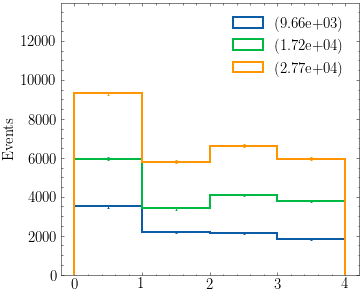

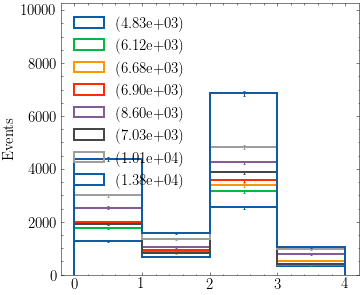

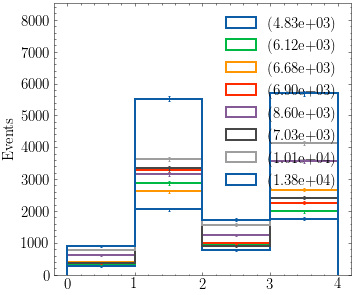

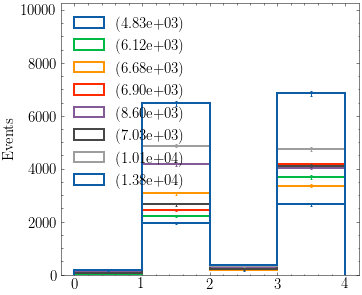

In [22]:
hist_multi(higgs_maxpt_id[[0,4,7],:,[0,2]])
hist_multi(higgs_maxpt_id[:,:,1])
hist_multi(higgs_maxpt_id[:,:,2])
hist_multi(higgs_maxpt_id[:,:,3])
